機械学習特論 第6回 決定木 で アヤメのデータの分類

In [2]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [4]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import load_iris
iris_data = load_iris()

# 学習用データのデータフレームを作成
x = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])
y = pd.DataFrame(iris_data["target"],columns=["target"])

In [5]:
# データフレームの情報を表示
print('feature shape:', x.shape) # 説明変数の形状
print('feature names:', iris_data["feature_names"]) # 説明変数の列名
print('target shape:', y.shape, y['target'].unique()) # 正解ラベルの形状とクラス名一覧
print('feature null check:\n', x.isnull().any(axis=0))
print('target null check:\n', y.isnull().any(axis=0))

feature shape: (150, 4)
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target shape: (150, 1) [0 1 2]
feature null check:
 sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool
target null check:
 target    False
dtype: bool


In [6]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=2) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:112 x_test:38 y_train:112 y_test:38


max_depth=3, accuracy_score:  train data :  0.98214 test data :  0.97368


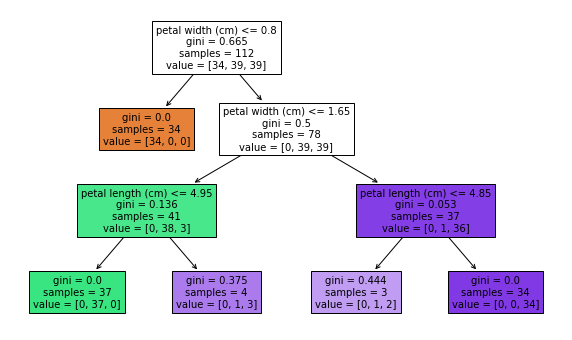

In [15]:
# 決定木を学習データを利用して学習
clf = DecisionTreeClassifier(max_depth=3, # 木の深さの最大
                             random_state=2) # 乱数シード
clf = clf.fit(x_train, y_train['target'])  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)
print('max_depth=3, accuracy_score: ', 
      f'train data : {metrics.accuracy_score(y_train, predict_train): 0.5}', 
      f'test data : {metrics.accuracy_score(y_test, predict_test): 0.5}')

# 決定木を表示
plt.figure(figsize=[10,6])
plot_tree(clf, feature_names=x_train.columns, filled=True)
plt.show()

In [8]:
# 決定木における各特徴量の重要度を確認
print('Feature_importance:')
for _column, _feature_importance in zip(x.columns, clf.feature_importances_):
    print(f'"{_column}" : {_feature_importance}')

Feature_importance:
"sepal length (cm)" : 0.0
"sepal width (cm)" : 0.0
"petal length (cm)" : 0.06519661391330597
"petal width (cm)" : 0.934803386086694


max_depth=1, accuracy_score:  train data :  0.65179 test data :  0.71053
max_depth=2, accuracy_score:  train data :  0.96429 test data :  0.94737
max_depth=3, accuracy_score:  train data :  0.98214 test data :  0.97368
max_depth=4, accuracy_score:  train data :  1.0 test data :  0.94737
max_depth=5, accuracy_score:  train data :  1.0 test data :  0.94737
max_depth=6, accuracy_score:  train data :  1.0 test data :  0.94737
max_depth=7, accuracy_score:  train data :  1.0 test data :  0.94737


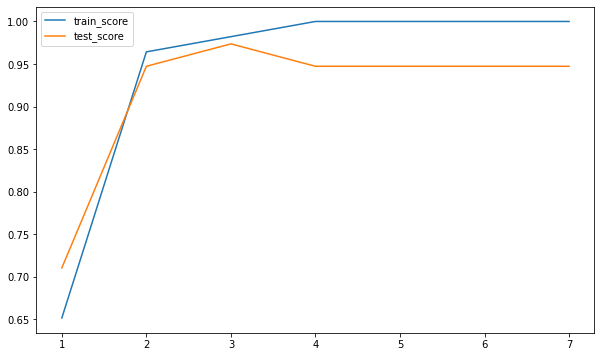

In [16]:
# 木の深さを変えて学習した決定木の性能を学習用データと検証用データで確認
_x = np.linspace(1, 7, 7) # グラフのx軸の設定 (1から7までの7点)
train_score = [] # グラフ用のリスト
test_score = [] # グラフ用のリスト
for i in range(7): # 木の深さは 1-7 (iに1を足して利用)
    # 決定木を学習データを利用して学習
    clf = DecisionTreeClassifier(max_depth=i+1, # 木の深さの最大
                                random_state=1) # 乱数シード
    clf = clf.fit(x_train, y_train['target'])  # * y_trainの列指定はwarning回避のため *

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    # 計算した性能はグラフ用のリストに格納
    predict_train = clf.predict(x_train)
    train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'max_depth={i+1}, accuracy_score: ', 
          f'train data : {train_score[i]: 0.5}', 
          f'test data : {test_score[i]: 0.5}')

# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, train_score, label='train_score')
plt.plot(_x, test_score, label='test_score')
plt.legend()
plt.show()